Extinction détectée à la génération 33.


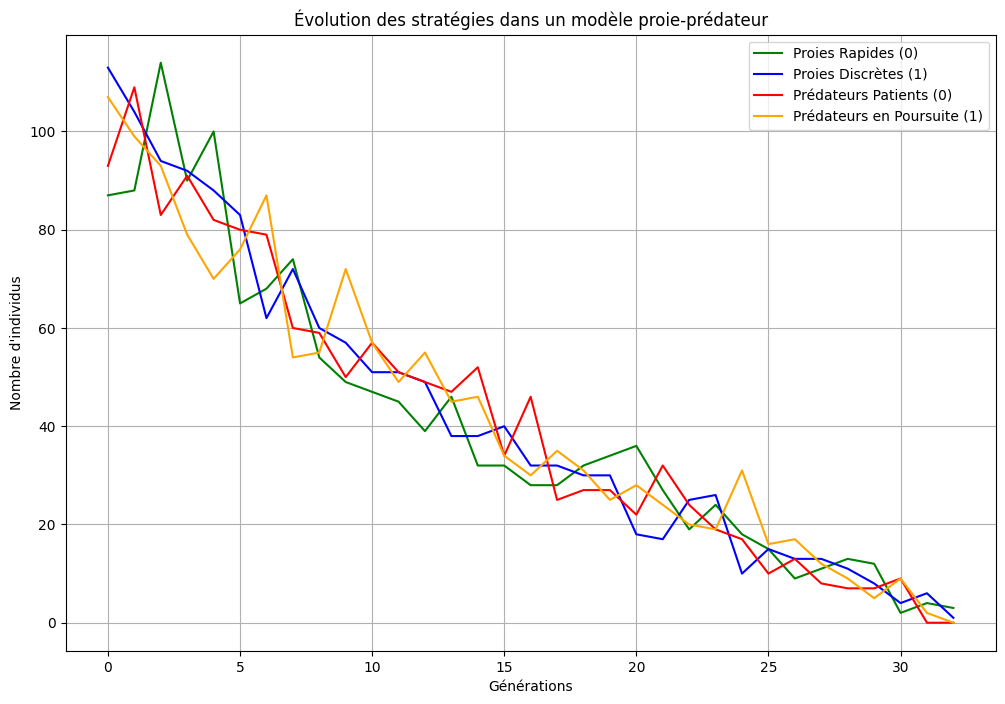

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Initialisation des paramètres ---
num_prey = 500
num_predator = 200

# Initialisation des stratégies
prey_strategies = np.array([0] * (num_prey // 2) + [1] * (num_prey // 2))
predator_strategies = np.array([0] * (num_predator // 2) + [1] * (num_predator // 2))

# Matrice des gains
payoff_matrix = {
    (0, 0): (1, -1),
    (0, 1): (-1, 1),
    (1, 0): (-1, 1),
    (1, 1): (1, -1)
}

num_generations = 100
mutation_rate = 0.5

# Stockage des résultats
generations = []
num_prey_discrete = []
num_prey_fast = []
num_predator_patient = []
num_predator_pursuit = []

# --- 2. Simulation ---
for generation in range(num_generations):
    if len(prey_strategies) == 0 or len(predator_strategies) == 0:
        print(f"Extinction détectée à la génération {generation}.")
        break

    # Mélange des indices pour garantir des interactions uniques
    num_interactions = min(len(prey_strategies), len(predator_strategies))
    prey_indices = np.random.permutation(len(prey_strategies))[:num_interactions]
    predator_indices = np.random.permutation(len(predator_strategies))[:num_interactions]

    # Calcul des gains
    prey_payoffs = np.zeros(len(prey_strategies))
    predator_payoffs = np.zeros(len(predator_strategies))

    for prey_idx, predator_idx in zip(prey_indices, predator_indices):
        prey_strategy = prey_strategies[prey_idx]
        predator_strategy = predator_strategies[predator_idx]

        # Calcul des gains selon la matrice
        prey_gain, predator_gain = payoff_matrix[(prey_strategy, predator_strategy)]
        prey_payoffs[prey_idx] += prey_gain
        predator_payoffs[predator_idx] += predator_gain

    # Sélection : seuls les individus avec un gain >= 0 survivent
    surviving_prey = prey_payoffs >= 0
    surviving_predators = predator_payoffs >= 0

    # Mise à jour des stratégies après la survie
    prey_strategies = prey_strategies[surviving_prey]
    predator_strategies = predator_strategies[surviving_predators]

    # Mise à jour des gains après filtrage
    prey_payoffs = prey_payoffs[surviving_prey]
    predator_payoffs = predator_payoffs[surviving_predators]

    # Reproduction : seuls les individus avec un gain > 0 se reproduisent
    reproducing_prey = prey_payoffs > 0
    reproducing_predators = predator_payoffs > 0

    # Reproduction avec mutation
    prey_strategies = np.concatenate([
        np.where(
            np.random.rand(np.sum(reproducing_prey)) < mutation_rate,
            1 - prey_strategies[reproducing_prey],
            prey_strategies[reproducing_prey]
        ) for _ in range(2)
    ])

    predator_strategies = np.concatenate([
        np.where(
            np.random.rand(np.sum(reproducing_predators)) < mutation_rate,
            1 - predator_strategies[reproducing_predators],
            predator_strategies[reproducing_predators]
        ) for _ in range(2)
    ])

    # Stocker les résultats
    generations.append(generation)
    num_prey_discrete.append(np.sum(prey_strategies == 1))
    num_prey_fast.append(np.sum(prey_strategies == 0))
    num_predator_patient.append(np.sum(predator_strategies == 0))
    num_predator_pursuit.append(np.sum(predator_strategies == 1))

# --- 3. Visualisation ---
# Évolution des populations
plt.figure(figsize=(12, 8))
plt.plot(generations, num_prey_fast, label="Proies Rapides (0)", color="green")
plt.plot(generations, num_prey_discrete, label="Proies Discrètes (1)", color="blue")
plt.plot(generations, num_predator_patient, label="Prédateurs Patients (0)", color="red")
plt.plot(generations, num_predator_pursuit, label="Prédateurs en Poursuite (1)", color="orange")
plt.xlabel("Générations")
plt.ylabel("Nombre d'individus")
plt.title("Évolution des stratégies dans un modèle proie-prédateur")
plt.legend()
plt.grid()
plt.show()

